In [25]:
import numpy as np
import pandas   as pd
train=pd.read_csv('train.csv')
import  numpy as np
def  kin_energy(random_vec):
    """return    kinetic  energy  of   random vector represented   of   (1,) dimmensional  array"""
    freq=np.unique(random_vec,return_counts=True)
    prob=freq[1]/random_vec.shape[0]
    energy=np.sum(prob**2)
    return  energy
def  ic(vector1,vector2):
    """return  information  coefficient   IC  for  2  random  variables 
    -defined as   dot product of   probabilities  corresponding to  each class
    
    """
    a=vector1
    b=vector2
    # get the probs  in order  to    do     dot product with  them 
    prob1=np.unique(a,return_counts=True)[1]/a.shape[0]
    prob2=np.unique(b,return_counts=True)[1]/b.shape[0]
    p1=list(prob1)
    p2=list(prob2)
    diff=len(p1)-len(p2)
    if diff>0:
        for elem in range(diff):
            p2.append(0)
    if diff<0:
        for  elem in range((diff*-1)):
            p1.append(0)
    ic=np.dot(np.array(p1),np.array(p2))
    return ic
    
 
def  o(vector1,vector2):
    """return onicescu   information   correlation   based on kinetic energy """
    i_c=ic(vector1,vector2)
    o=i_c/np.sqrt(kin_energy(vector1)*kin_energy(vector2))
    return o
              

In [26]:
train.head(10)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
5,5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,...,5.0,0,0,0,0,0,0,0,0,5017319.0
6,6,10/11/2010,İstanbul,Big Cities,IL,2,3.0,4.0,4.0,1,...,3.0,4,5,2,2,3,5,4,4,5166635.0
7,7,06/21/2011,İstanbul,Big Cities,IL,4,5.0,4.0,5.0,2,...,2.0,0,0,0,0,0,0,0,0,4491607.0
8,8,08/28/2010,Afyonkarahisar,Other,IL,1,1.0,4.0,4.0,1,...,3.0,4,5,5,3,4,5,4,5,4952497.0
9,9,11/16/2011,Edirne,Other,IL,6,4.5,6.0,7.5,6,...,2.5,0,0,0,0,0,0,0,0,5444227.0


In [83]:
#subset   from   P30   TO  P37 CAUS THEY LOOK  CATEGORICAL
names=["P1","P5","P30","P31","P32","P33","P34","P35","P36","P37"]

In [84]:
tr=train[[col for col in train.columns if col in names]]

In [85]:
tr.head(10)

,P1,P5,P30,P31,P32,P33,P34,P35,P36,P37
0,4,2,5,3,4,5,5,4,3,4
1,4,1,0,0,0,0,0,0,0,0
2,2,2,0,0,0,0,0,0,0,0
3,6,4,25,12,10,6,18,12,12,6
4,3,2,5,1,3,2,3,4,3,3
5,6,8,0,0,0,0,0,0,0,0
6,2,1,4,5,2,2,3,5,4,4
7,4,2,0,0,0,0,0,0,0,0
8,1,1,4,5,5,3,4,5,4,5
9,6,6,0,0,0,0,0,0,0,0


In [86]:
rows = tr.shape[1]
rows

10

In [87]:
matrix= np.zeros((rows,rows))

In [88]:
chech_simmetry=[]
for i in range(rows):
    for j in  range(i, rows):
        cor=o(tr[names[i]],tr[names[j]])
  
        matrix[i,j]=cor
        matrix[j,i]=cor
        chech_simmetry.append(o(tr[names[i]],tr[names[j]])==o(tr[names[j]],tr[names[i]]))
    

In [89]:
matrix=pd.DataFrame(matrix)
matrix

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.675653,0.268167,0.272264,0.274514,0.408126,0.356035,0.205522,0.328922,0.351370
1,0.675653,1.000000,0.584106,0.633065,0.594941,0.746359,0.625737,0.575085,0.592034,0.660981
2,0.268167,0.584106,1.000000,0.948606,0.982466,0.952058,0.964821,0.985159,0.966881,0.982362
3,0.272264,0.633065,0.948606,1.000000,0.987624,0.966258,0.959152,0.953761,0.958286,0.967886
4,0.274514,0.594941,0.982466,0.987624,1.000000,0.968599,0.977803,0.974624,0.975671,0.987410
5,0.408126,0.746359,0.952058,0.966258,0.968599,1.000000,0.980045,0.932432,0.970005,0.987922
6,0.356035,0.625737,0.964821,0.959152,0.977803,0.980045,1.000000,0.945015,0.994502,0.993238
7,0.205522,0.575085,0.985159,0.953761,0.974624,0.932432,0.945015,1.000000,0.951840,0.965682
8,0.328922,0.592034,0.966881,0.958286,0.975671,0.970005,0.994502,0.951840,1.000000,0.986442
9,0.351370,0.660981,0.982362,0.967886,0.987410,0.987922,0.993238,0.965682,0.986442,1.000000


In [90]:
matrix.columns=names

In [97]:
matrix.index=matrix.index.set_names=names

In [98]:
matrix

,P1,P5,P30,P31,P32,P33,P34,P35,P36,P37
P1,1.000000,0.675653,0.268167,0.272264,0.274514,0.408126,0.356035,0.205522,0.328922,0.351370
P5,0.675653,1.000000,0.584106,0.633065,0.594941,0.746359,0.625737,0.575085,0.592034,0.660981
P30,0.268167,0.584106,1.000000,0.948606,0.982466,0.952058,0.964821,0.985159,0.966881,0.982362
P31,0.272264,0.633065,0.948606,1.000000,0.987624,0.966258,0.959152,0.953761,0.958286,0.967886
P32,0.274514,0.594941,0.982466,0.987624,1.000000,0.968599,0.977803,0.974624,0.975671,0.987410
P33,0.408126,0.746359,0.952058,0.966258,0.968599,1.000000,0.980045,0.932432,0.970005,0.987922
P34,0.356035,0.625737,0.964821,0.959152,0.977803,0.980045,1.000000,0.945015,0.994502,0.993238
P35,0.205522,0.575085,0.985159,0.953761,0.974624,0.932432,0.945015,1.000000,0.951840,0.965682
P36,0.328922,0.592034,0.966881,0.958286,0.975671,0.970005,0.994502,0.951840,1.000000,0.986442
P37,0.351370,0.660981,0.982362,0.967886,0.987410,0.987922,0.993238,0.965682,0.986442,1.000000


In [101]:
import  string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [123]:
corr=matrix

In [124]:
corr

,P1,P5,P30,P31,P32,P33,P34,P35,P36,P37
P1,1.000000,0.675653,0.268167,0.272264,0.274514,0.408126,0.356035,0.205522,0.328922,0.351370
P5,0.675653,1.000000,0.584106,0.633065,0.594941,0.746359,0.625737,0.575085,0.592034,0.660981
P30,0.268167,0.584106,1.000000,0.948606,0.982466,0.952058,0.964821,0.985159,0.966881,0.982362
P31,0.272264,0.633065,0.948606,1.000000,0.987624,0.966258,0.959152,0.953761,0.958286,0.967886
P32,0.274514,0.594941,0.982466,0.987624,1.000000,0.968599,0.977803,0.974624,0.975671,0.987410
P33,0.408126,0.746359,0.952058,0.966258,0.968599,1.000000,0.980045,0.932432,0.970005,0.987922
P34,0.356035,0.625737,0.964821,0.959152,0.977803,0.980045,1.000000,0.945015,0.994502,0.993238
P35,0.205522,0.575085,0.985159,0.953761,0.974624,0.932432,0.945015,1.000000,0.951840,0.965682
P36,0.328922,0.592034,0.966881,0.958286,0.975671,0.970005,0.994502,0.951840,1.000000,0.986442
P37,0.351370,0.660981,0.982362,0.967886,0.987410,0.987922,0.993238,0.965682,0.986442,1.000000


In [127]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

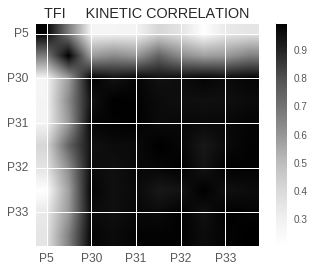

In [159]:
def correlation_matrix(matrix,names):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 130)
    cax = ax1.imshow(matrix)
    ax1.grid(True)
    plt.title('TFI     KINETIC CORRELATION')
    labels= names
    ax1.set_xticklabels(labels,fontsize=12)
    ax1.set_yticklabels(labels,fontsize=12)
 
    cbar = fig.colorbar(cax, ticks=[.1,.2,.3,.4,.5,.6,.7,.8,.9])
    plt.show()

correlation_matrix(matrix,names)

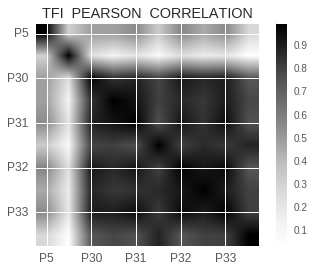

In [162]:
def correlation_matrix(matrix,names):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 130)
    cax = ax1.imshow(matrix)
    ax1.grid(True)
    plt.title('TFI  PEARSON  CORRELATION')
    labels= names
    ax1.set_xticklabels(labels,fontsize=12)
    ax1.set_yticklabels(labels,fontsize=12)
 
    cbar = fig.colorbar(cax, ticks=[.1,.2,.3,.4,.5,.6,.7,.8,.9])
    plt.show()

correlation_matrix(tr.corr(),names)